#**Project 3 COVID19 pendemic data analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True

In [ ]:
#load data
dp = pd.read_csv("/content/owid-covid-data.csv")

In [ ]:
print(dp)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [ ]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [ ]:
print(f' The data has {dp.shape} rows and columns')

 The data has (429435, 67) rows and columns


In [ ]:
#convert data
dp['data'] =pd.to_datetime(dp['date'])

In [ ]:
#global daliy new cases
global_cases = dp.groupby('data')['new_cases'].sum()

# Cumulative cases
cumulative_cases = global_cases.cumsum()

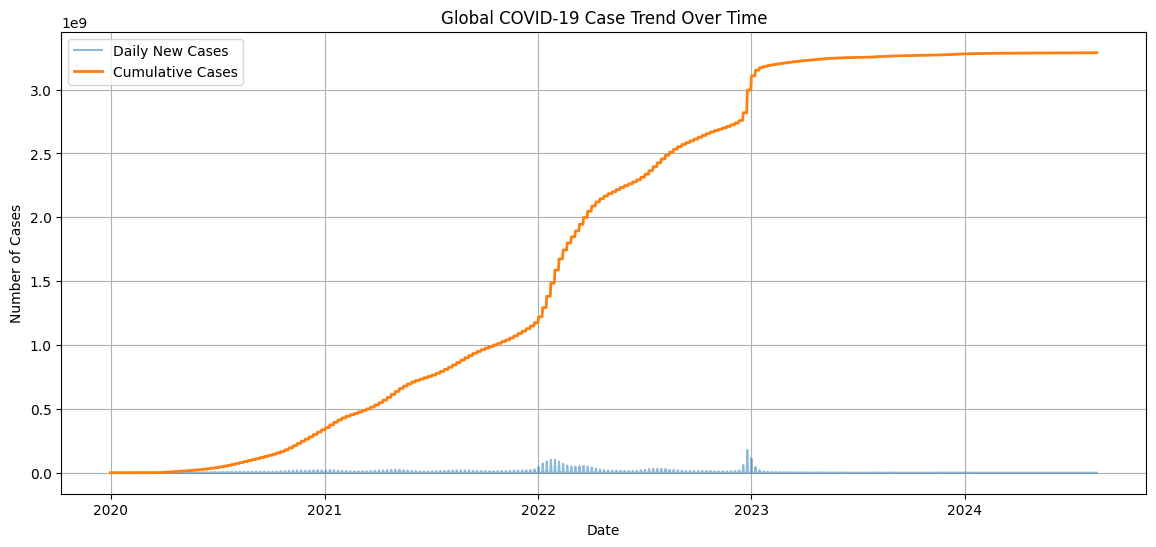

In [ ]:
# Plot
plt.figure(figsize=(14,6))
plt.plot(global_cases, label='Daily New Cases', alpha=0.5)
plt.plot(cumulative_cases, label='Cumulative Cases', linewidth=2)
plt.title("Global COVID-19 Case Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Filter recent data
latest = dp[dp['date'] == dp['date'].max()]

# Top countries by total cases
top_cases = latest[['location', 'total_cases']].dropna().sort_values(by='total_cases', ascending=False).head(10)

# Top countries by total deaths
top_deaths = latest[['location', 'total_deaths']].dropna().sort_values(by='total_deaths', ascending=False).head(10)

print("Top 10 Countries by Total Cases:\n", top_cases)
print("\nTop 10 Countries by Total Deaths:\n", top_deaths)


Top 10 Countries by Total Cases:
 Empty DataFrame
Columns: [location, total_cases]
Index: []

Top 10 Countries by Total Deaths:
 Empty DataFrame
Columns: [location, total_deaths]
Index: []


In [ ]:
print(latest[['location','total_deaths','total_cases']].isnull().sum())

location        0
total_deaths    8
total_cases     8
dtype: int64


In [ ]:
valid_data = latest[(latest['total_deaths'].notnull()) &
                    (latest['total_cases'].notnull()) &
                    (latest['total_cases'] > 0)]

valid_data['fatality_rate'] = valid_data['total_deaths'] / valid_data['total_cases']
valid_data = latest[(latest['total_deaths'].notnull()) &
                    (latest['total_cases'].notnull()) &
                    (latest['total_cases'] > 0)]

valid_data['fatality_rate'] = valid_data['total_deaths'] / valid_data['total_cases']
fatality = valid_data[['location', 'fatality_rate']].sort_values(by='fatality_rate', ascending=False).head(10)

print("Top 10 Countries by Fatality Rate:\n", fatality)

Top 10 Countries by Fatality Rate:
 Empty DataFrame
Columns: [location, fatality_rate]
Index: []


In [ ]:
print(latest.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
valid_data['fatality_rate'] = valid_data['total_deaths'] / valid_data['total_cases']

In [ ]:
fatality = valid_data[['location', 'fatality_rate']].sort_values(by='fatality_rate', ascending=False).head(10)

print("Top 10 Countries by Fatality Rate:\n", fatality)

Top 10 Countries by Fatality Rate:
 Empty DataFrame
Columns: [location, fatality_rate]
Index: []


In [ ]:
print(valid_data.shape)

(0, 69)


In [ ]:
# Keep only the latest data per country
latest = dp.sort_values('date').groupby('location').tail(1)

# Filter for countries with valid data
valid_data = latest[
    (latest['total_deaths'].notnull()) &
    (latest['total_cases'].notnull()) &
    (latest['total_cases'] > 0)
]

# Calculate fatality rate
valid_data['fatality_rate'] = valid_data['total_deaths'] / valid_data['total_cases']

# Get top 10 countries by fatality rate
fatality = valid_data[['location', 'fatality_rate']].sort_values(
    by='fatality_rate', ascending=False).head(10)
# Keep only the latest data per country
latest = dp.sort_values('date').groupby('location').tail(1)

# Filter for countries with valid data
valid_data = latest[
    (latest['total_deaths'].notnull()) &
    (latest['total_cases'].notnull()) &
    (latest['total_cases'] > 0)
]

# Calculate fatality rate
valid_data['fatality_rate'] = valid_data['total_deaths'] / valid_data['total_cases']

# Get top 10 countries by fatality rate
fatality = valid_data[['location', 'fatality_rate']].sort_values(
    by='fatality_rate', ascending=False).head(10)

# Display result
print("Top 10 Countries by Fatality Rate:\n", fatality)

Top 10 Countries by Fatality Rate:
                       location  fatality_rate
426086                   Yemen       0.180745
367607                   Sudan       0.078852
374303                   Syria       0.055082
355889                 Somalia       0.049791
302690                    Peru       0.048813
107157                   Egypt       0.048118
245371                  Mexico       0.043907
48559   Bosnia and Herzegovina       0.040608
212061                 Liberia       0.037074
1673               Afghanistan       0.034003


In [ ]:
top_vaccinated = latest[['location', 'people_fully_vaccinated']].dropna().sort_values(by='people_fully_vaccinated', ascending=False).head(10)
print("Top 10 Countries by Number of Fully Vaccinated People:\n", top_vaccinated)

Top 10 Countries by Number of Fully Vaccinated People:
                              location  people_fully_vaccinated
424412                          World             5.177943e+09
21775                            Asia             3.462095e+09
408137  Upper-middle-income countries             1.990653e+09
165198          High-income countries             9.292560e+08
120252                         Europe             4.937513e+08
121602            European Union (27)             3.279674e+08
230301                       Malaysia             2.755114e+07
217093                      Lithuania             1.881106e+06
